In [85]:
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay,f1_score
from sklearn.ensemble import RandomForestClassifier



In [52]:
np.random.seed(31415)

## Definition of Function

In [82]:
def make_df_ready(name_csv):
    df=pd.read_csv(name_csv)
    df=df.drop("Unnamed: 0",axis=1)
    df=df.drop_duplicates(subset=["Lyrics"])
    df.reset_index(drop=True,inplace=True)
    return df

def prepare_final_df(name_csv_table):
    final_df=pd.DataFrame()
    for iter in range(len(name_csv_table)):
        final_df_temp=make_df_ready(name_csv_table[iter])
        final_df = pd.concat([final_df, final_df_temp], axis=0)
    return final_df
    
def printEvaluations (clf, X_test,y_test):        
    """Returns Confusion Matrix and relevant metrics for predictions of classifiers.
    Takes classification model and split data."""
    y_pred = clf.predict(X_test)   
    print(f'How does model {clf} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(y_test, y_pred), 3)}')
    print(f'The precision of the model is: {round(precision_score(y_test, y_pred), 3)}')
    print(f'The recall of the model is: {round(recall_score(y_test, y_pred), 3)}')

    #print confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Greens')
    

In [3]:
name_csv_radiohead="final_lyrics_dataf.csv"
name_csv_coldplay="final_cold_lyrics_df.csv"
name_csv_table=[name_csv_radiohead,name_csv_coldplay]

In [4]:
result=prepare_final_df(name_csv_table)
result

,Artist,Link,Lyrics
0,Radiohead,https://www.lyrics.com/lyric/33903378/Radiohea...,"['Karma police', 'Arrest this man', 'He talks ..."
1,Radiohead,https://www.lyrics.com/lyric/33740754/Radiohea...,"['Dreamers', 'They never learn', 'They never l..."
2,Radiohead,https://www.lyrics.com/lyric/34465042/Radiohea...,"[""You don't wanna talk to me,"", ""You don't wan..."
3,Radiohead,https://www.lyrics.com/lyric/32911902/Radiohea...,"['Stay in the shadows', 'Cheer at the gallows'..."
4,Radiohead,https://www.lyrics.com/lyric/33446757/Radiohea...,"['Then in your life, there comes the darkness'..."
...,...,...,...
147,Coldplay,https://www.lyrics.com/lyric/24835413/Coldplay...,"['Steal my heart and hold my tongue', 'I feel ..."
148,Coldplay,https://www.lyrics.com/lyric/18658647/Coldplay...,"[""There's a wild wind blowing,"", 'Down the cor..."
149,Coldplay,https://www.lyrics.com/lyric/36007329/Coldplay...,"['Lovers keep on the road your on', 'Runners u..."
150,Coldplay,https://www.lyrics.com/lyric/19568673/Coldplay...,"['How long before I get in?', 'Before it start..."


## Assigning 0 and 1 to columns

In [5]:
result["Artist"].replace("Radiohead",0,inplace=True)
result["Artist"].replace("Coldplay",1,inplace=True)
result

,Artist,Link,Lyrics
0,0,https://www.lyrics.com/lyric/33903378/Radiohea...,"['Karma police', 'Arrest this man', 'He talks ..."
1,0,https://www.lyrics.com/lyric/33740754/Radiohea...,"['Dreamers', 'They never learn', 'They never l..."
2,0,https://www.lyrics.com/lyric/34465042/Radiohea...,"[""You don't wanna talk to me,"", ""You don't wan..."
3,0,https://www.lyrics.com/lyric/32911902/Radiohea...,"['Stay in the shadows', 'Cheer at the gallows'..."
4,0,https://www.lyrics.com/lyric/33446757/Radiohea...,"['Then in your life, there comes the darkness'..."
...,...,...,...
147,1,https://www.lyrics.com/lyric/24835413/Coldplay...,"['Steal my heart and hold my tongue', 'I feel ..."
148,1,https://www.lyrics.com/lyric/18658647/Coldplay...,"[""There's a wild wind blowing,"", 'Down the cor..."
149,1,https://www.lyrics.com/lyric/36007329/Coldplay...,"['Lovers keep on the road your on', 'Runners u..."
150,1,https://www.lyrics.com/lyric/19568673/Coldplay...,"['How long before I get in?', 'Before it start..."


## Defining of X and y

In [6]:
X=result["Lyrics"]
y=result["Artist"]
X.shape,y.shape


((324,), (324,))

## Split of Data

#Split of Test Data

In [7]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=42)

In [8]:
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((243,), (81,), (243,), (81,))

#Split the Remaining Test Data as Train and Test Data

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_train1,y_train1,random_state=42)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182,), (61,), (182,), (61,))

## Sklearn CountVectorizer

In [ ]:
# vectorizer = CountVectorizer(lowercase=True, stop_words='english', token_pattern='[A-Za-z]+', ngram_range=(1,1))
# X_cv = vectorizer.fit_transform(X_train)
# df_bow_sklearn = pd.DataFrame(X_cv.toarray(), columns=vectorizer.get_feature_names_out())
# df_bow_sklearn

## Model

In [62]:
np.random.seed(31415)
text_clf=Pipeline([("vect",CountVectorizer()),("tfidf",TfidfTransformer()),("clf",RandomForestClassifier())])
text_clf.fit(X_train,y_train)
ypred=text_clf.predict(X_test)
accuracy_score(y_test, ypred)


0.9344262295081968

In [63]:
ypred1=text_clf.predict(X_test1)
accuracy_score(y_test1, ypred1)

0.8888888888888888

How does model Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())]) score:
The accuracy of the model is: 0.934
The precision of the model is: 0.963
The recall of the model is: 0.897


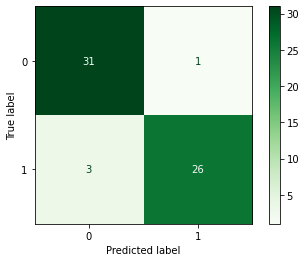

In [64]:
#y_test=y_test.to_numpy()
printEvaluations(text_clf,X_test,y_test)

How does model Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())]) score:
The accuracy of the model is: 0.889
The precision of the model is: 0.914
The recall of the model is: 0.842


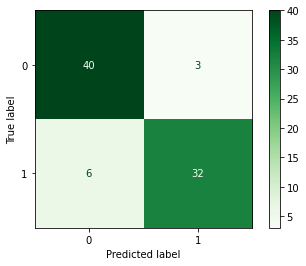

In [65]:
printEvaluations(text_clf,X_test1,y_test1)

## Grid Search

In [73]:
from sklearn.model_selection import RandomizedSearchCV


In [74]:
np.random.seed(31415)
# Number of trees in random forest
clf__n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
clf__max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
clf__max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
clf__max_depth.append(None)
# Minimum number of samples required to split a node
clf__min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
clf__min_samples_leaf = [1, 2, 4]

In [75]:
random_grid = {'clf__n_estimators': clf__n_estimators,
               'clf__max_features': clf__max_features,
               'clf__max_depth': clf__max_depth,
               'clf__min_samples_split': clf__min_samples_split,
               'clf__min_samples_leaf': clf__min_samples_leaf
               }

In [76]:
np.random.seed(31415)
rf_random = RandomizedSearchCV(estimator = text_clf, param_distributions = random_grid, n_iter = 1000, cv = 10, verbose=1, random_state=np.random.seed(31415), n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'clf__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110, None],
                                        'clf__max_features': ['auto', 'sqrt'],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'clf__n_estimators': [200, 400, 600,
                                                              800, 1000, 1200,
                                  

In [77]:
rf_random.best_params_

{'clf__n_estimators': 400,
 'clf__min_samples_split': 5,
 'clf__min_samples_leaf': 2,
 'clf__max_features': 'auto',
 'clf__max_depth': 100}

In [78]:
from sklearn.model_selection import GridSearchCV
np.random.seed(31415)
params_grid_search={'clf__n_estimators': [50,100,300,400,500],
 'clf__min_samples_split': [3,4,5,6,7],
 'clf__min_samples_leaf': [1,2,3,4],
 'clf__max_depth': [80,90,100,110],
 "clf__max_features": ["auto"]}
Random_GS = GridSearchCV(estimator=text_clf,param_grid=params_grid_search, n_jobs=-1)
Random_GS.fit(X_train,y_train)
Random_GS.best_params_

{'clf__max_depth': 90,
 'clf__max_features': 'auto',
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 6,
 'clf__n_estimators': 300}

In [79]:
ypred1=Random_GS.predict(X_test1)
accuracy_score(y_test1,ypred1)

0.8765432098765432

How does model GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [80, 90, 100, 110],
                         'clf__max_features': ['auto'],
                         'clf__min_samples_leaf': [1, 2, 3, 4],
                         'clf__min_samples_split': [3, 4, 5, 6, 7],
                         'clf__n_estimators': [50, 100, 300, 400, 500]}) score:
The accuracy of the model is: 0.934
The precision of the model is: 0.963
The recall of the model is: 0.897


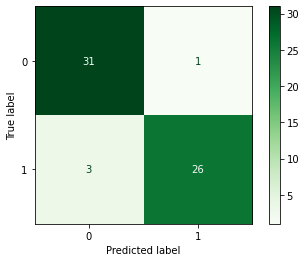

In [81]:
printEvaluations(Random_GS,X_test,y_test)

How does model GridSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [80, 90, 100, 110],
                         'clf__max_features': ['auto'],
                         'clf__min_samples_leaf': [1, 2, 3, 4],
                         'clf__min_samples_split': [3, 4, 5, 6, 7],
                         'clf__n_estimators': [50, 100, 300, 400, 500]}) score:
The accuracy of the model is: 0.877
The precision of the model is: 0.868
The recall of the model is: 0.868


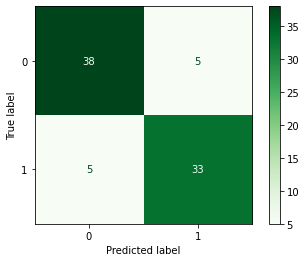

In [80]:
printEvaluations(Random_GS,X_test1,y_test1)